In [1]:
import yfinance as yf
import pandas as pd
import matplotlib as mp
import numpy as np

# 1. Major outperforming tech stocks after Covid 19 outbreak

## (A) Daily Culumative Closing Price

In [2]:
#Extract the stock pricing data for above tech stock since beginning of 2020, before the peak of the pandemic.
Tech_Stocks = yf.download("MSFT AAPL FB GOOGL AMZN", start="2020-01-01", end="2020-06-30",auto_adjust = True)
Closing_Tech_Stocks= Tech_Stocks["Close"]
Closing_Tech_Stocks

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2019-12-31,291.638000,1847.839966,205.250000,1339.390015,156.833633
2020-01-02,298.292145,1898.010010,209.779999,1368.680054,159.737595
2020-01-03,295.392120,1874.969971,208.669998,1361.520020,157.748581
2020-01-06,297.745880,1902.880005,212.600006,1397.810059,158.156342
2020-01-07,296.345581,1906.859985,213.059998,1395.109985,156.714310
...,...,...,...,...,...
2020-06-23,365.870331,2764.409912,242.240005,1463.979980,201.910004
2020-06-24,359.411987,2734.399902,234.020004,1432.699951,197.839996
2020-06-25,364.183380,2754.580078,235.679993,1441.099976,200.339996


In [3]:
All_Tech_Stock = Closing_Tech_Stocks.sum(axis=1)
All_Tech_Stock

Date
2019-12-31    3840.951614
2020-01-02    3934.499802
2020-01-03    3898.300690
2020-01-06    3969.192291
2020-01-07    3968.089859
                 ...     
2020-06-23    5038.410233
2020-06-24    4958.371841
2020-06-25    4995.883423
2020-06-26    4820.813721
2020-06-29    4857.758804
Length: 125, dtype: float64

## (B) Computing Daily Returns

In [4]:
#This computes the daily returns on tech stock since the Covid 19 outbreak in terms of percentage
Change_In_Tech_Stock = Closing_Tech_Stocks/Closing_Tech_Stocks.shift(1)-1
Daily_Change_In_Tech_Stocks = Change_In_Tech_Stock.dropna(0)
Returns_On_Tech_Stock = Daily_Change_In_Tech_Stocks.pct_change().dropna(0)
Returns_On_Tech_Stock

,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2020-01-03,-1.426100,-1.447100,-1.239742,-1.239222,-1.672479
2020-01-06,-1.819603,-2.226257,-4.559379,-6.095071,-1.207591
2020-01-07,-1.590217,-0.859491,-0.885118,-1.072471,-4.527349
2020-01-08,-4.420401,-4.733419,3.685609,-4.684816,-2.746948
2020-01-09,0.320447,-1.614609,0.411613,0.474892,-0.215672
...,...,...,...,...,...
2020-06-23,-0.184188,0.284882,6.010512,-0.497271,-0.759450
2020-06-24,-1.826994,-1.582346,-3.687918,-3.326994,-4.017170
2020-06-25,-1.752071,-1.679828,-1.209038,-1.274406,-1.626886


# 2 Market Benchmark (S&P500)

## (A) Daily Closing Price Of S&P500

In [5]:
import pandas_datareader.data as web
import datetime as dt

In [6]:
start = dt.datetime(2019,12,31)
end = dt.datetime(2020,6,30)

In [7]:
#Extract the data for the SnP500 index since the beginning of 2020
SnP500 = web.DataReader(["sp500"],'fred',start,end).dropna(0)
SnP500

,sp500
DATE,
2019-12-31,3230.78
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
...,...
2020-06-24,3050.33
2020-06-25,3083.76
2020-06-26,3009.05


## (B) Computing Daily Returns of S&P500

In [8]:
Change_In_SnP500 = SnP500/SnP500.shift(1)-1
Daily_Change_In_SnP500 = Change_In_SnP500.dropna(0)
Returns_On_SnP500 = Change_In_SnP500.pct_change().dropna(0)
Returns_On_SnP500

,sp500
DATE,
2020-01-03,-1.842589
2020-01-06,-1.500490
2020-01-07,-1.793347
2020-01-08,-2.748858
2020-01-09,0.357554
...,...
2020-06-24,-7.002440
2020-06-25,-1.423879
2020-06-26,-3.210592


# Breadth between S&P500 & average cumulative closing price of major tech stocks

In [9]:
#How many times is cumulative closing price of major tech stocks greater than S&P500 since the commencement of 2020.
Result = All_Tech_Stock/SnP500["sp500"]
Result.mean()

1.4070113879890667

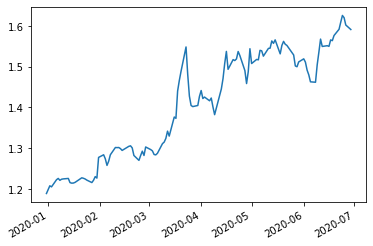

In [10]:
Result.plot()

In [11]:
Returns_On_SnP500 = Change_In_SnP500.pct_change().dropna(0)
Returns_On_SnP500.mean()

sp500   -2.424196
dtype: float64

In [12]:
All = pd.concat([Returns_On_SnP500, Returns_On_Tech_Stock], axis=1).dropna(0)
All

,sp500,AAPL,AMZN,FB,GOOGL,MSFT
2020-01-03,-1.842589,-1.426100,-1.447100,-1.239742,-1.239222,-1.672479
2020-01-06,-1.500490,-1.819603,-2.226257,-4.559379,-6.095071,-1.207591
2020-01-07,-1.793347,-1.590217,-0.859491,-0.885118,-1.072471,-4.527349
2020-01-08,-2.748858,-4.420401,-4.733419,3.685609,-4.684816,-2.746948
2020-01-09,0.357554,0.320447,-1.614609,0.411613,0.474892,-0.215672
...,...,...,...,...,...,...
2020-06-23,-0.336812,-0.184188,0.284882,6.010512,-0.497271,-0.759450
2020-06-24,-7.002440,-1.826994,-1.582346,-3.687918,-3.326994,-4.017170
2020-06-25,-1.423879,-1.752071,-1.679828,-1.209038,-1.274406,-1.626886
2020-06-26,-3.210592,-3.314464,-4.035547,-12.724142,-10.297832,-2.583982


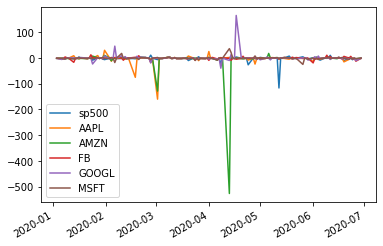

In [13]:
All.plot()